In [35]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt


In [36]:
df = pd.read_csv("Bank Customer Churn Prediction.csv")


In [37]:
df.head(5)

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [38]:
df.columns

Index(['customer_id', 'credit_score', 'country', 'gender', 'age', 'tenure',
       'balance', 'products_number', 'credit_card', 'active_member',
       'estimated_salary', 'churn'],
      dtype='object')

In [39]:
df.isnull().sum()

customer_id         0
credit_score        0
country             0
gender              0
age                 0
tenure              0
balance             0
products_number     0
credit_card         0
active_member       0
estimated_salary    0
churn               0
dtype: int64

In [40]:
df

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,15606229,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,15569892,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,15584532,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,15682355,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [43]:
#convert gender 
df['gender'].replace({'Male': 1, 'Female': 0}, inplace=True)

#curn already-> 0/1

In [44]:
df

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,0,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,0,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,0,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,0,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,0,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,15606229,771,France,1,39,5,0.00,2,1,0,96270.64,0
9996,15569892,516,France,1,35,10,57369.61,1,1,1,101699.77,0
9997,15584532,709,France,0,36,7,0.00,1,0,1,42085.58,1
9998,15682355,772,Germany,1,42,3,75075.31,2,1,0,92888.52,1


In [46]:
X = df[['age', 'tenure', 'gender']]  
y = df['churn']


In [49]:
X_train,X_test ,y_train , y_test = train_test_split(X,y , test_size=0.2 , random_state=42)



In [50]:
model = GaussianNB()

In [51]:
model

GaussianNB()

In [52]:
model.fit(X_train, y_train)

GaussianNB()

In [54]:
y_pred=model.predict(X_test)

In [ ]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

In [55]:
print("Accuracy",accuracy_score(y_test,y_pred))

Accuracy 0.7875


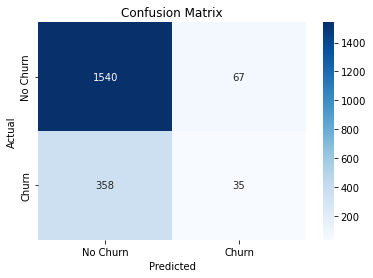

In [71]:
cm = confusion_matrix(y_test , y_pred)
sns.heatmap(cm, annot=True, fmt='d' ,cmap='Blues',xticklabels=['No Churn', 'Churn'], yticklabels=['No Churn', 'Churn'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()                                    

In [ ]:
#imbalance problem.


In [72]:
from sklearn.metrics import f1_score
f1 = f1_score(y_test, y_pred)
f1

0.1414141414141414

In [73]:
import joblib


In [74]:
joblib.dump(model, "NBmodel")

['NBmodel']